<a href="https://colab.research.google.com/github/SerhiiMis/deep_learning_goit/blob/main/dz_topic_04_SerhiiMishovych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Кількість пропущених значень у кожному стовпці:
 CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64
       CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
count       1030.000000       1030.000000      1030.000000     1030.000000   
mean         281.167864         73.895825        54.188350      181.567282   
std          104.506364         86.279342        63.997004       21.354219   
min          102.000000          0.000000         0.000000      121.800000   
25%          192.375000          0.000000         0.000000      164.900000   
50%          272.900000         22.000000         0.000000      185.000000   
75%          350.000000        142.950000       118.300000      192.000000   
max          540.000000        359.

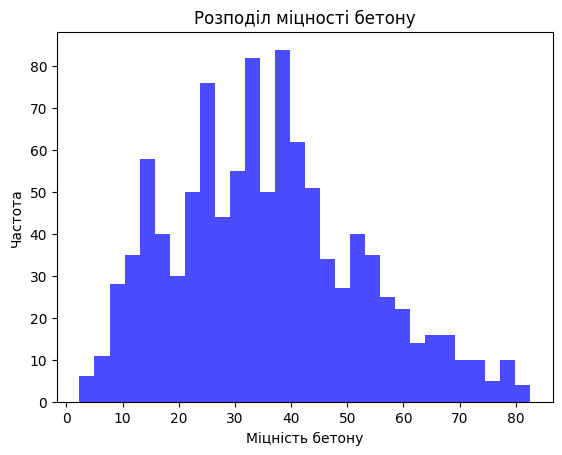

Форма X_train: torch.Size([824, 8])
Форма y_train: torch.Size([824, 1])


In [11]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Завантажуємо дані
df = pd.read_csv(r'/ConcreteStrengthData.csv')

# Перевірка на пропущені значення
print("Кількість пропущених значень у кожному стовпці:\n", df.isnull().sum())

# Статистичний опис даних
print(df.describe())

# Розподіл цільової змінної (Strength)
plt.hist(df['Strength'], bins=30, alpha=0.7, color='blue')
plt.xlabel('Міцність бетону')
plt.ylabel('Частота')
plt.title('Розподіл міцності бетону')
plt.show()

# Розділяємо ознаки (X) та цільову змінну (y)
X = df.drop(columns=['Strength']).values
y = df['Strength'].values

# Розділяємо на навчальний (80%) і тестовий (20%) набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормалізація ознак (StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Перетворюємо в тензори PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

print("Форма X_train:", X_train_tensor.shape)
print("Форма y_train:", y_train_tensor.shape)


In [12]:

class ConcreteNN(nn.Module):
    def __init__(self):
        super(ConcreteNN, self).__init__()
        self.fc1 = nn.Linear(8, 64)  # Вхідний шар (8 ознак → 64 нейрони)
        self.fc2 = nn.Linear(64, 32)  # Прихований шар (64 → 32)
        self.fc3 = nn.Linear(32, 1)  # Вихідний шар (32 → 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Ініціалізація моделі
model = ConcreteNN()

In [13]:

# Визначаємо функцію втрат (MSE) та оптимізатор (Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Кількість епох
epochs = 500

# Зберігатимемо втрати для візуалізації
losses = []

Epoch [50/500], Loss: 161.2238
Epoch [100/500], Loss: 127.4193
Epoch [150/500], Loss: 111.0734
Epoch [200/500], Loss: 101.3748
Epoch [250/500], Loss: 76.0263
Epoch [300/500], Loss: 54.2879
Epoch [350/500], Loss: 41.7079
Epoch [400/500], Loss: 33.8495
Epoch [450/500], Loss: 30.4681
Epoch [500/500], Loss: 27.5741


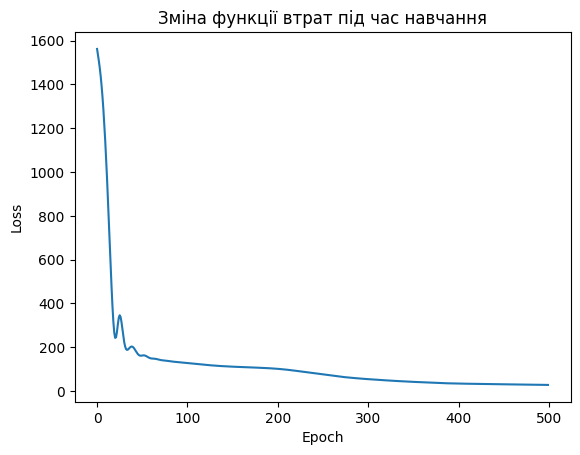

In [14]:

for epoch in range(epochs):
    optimizer.zero_grad()  # Обнуляємо градієнти
    outputs = model(X_train_tensor)  # Прогноз
    loss = criterion(outputs, y_train_tensor)  # Обчислення втрат
    loss.backward()  # Зворотне поширення помилки
    optimizer.step()  # Оновлення ваг
    losses.append(loss.item())  # Зберігаємо втрату

    if (epoch + 1) % 50 == 0:  # Виводимо кожні 50 епох
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Графік функції втрат
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Зміна функції втрат під час навчання')
plt.show()

MSE: 36.87
MAE: 4.69
R²: 0.86


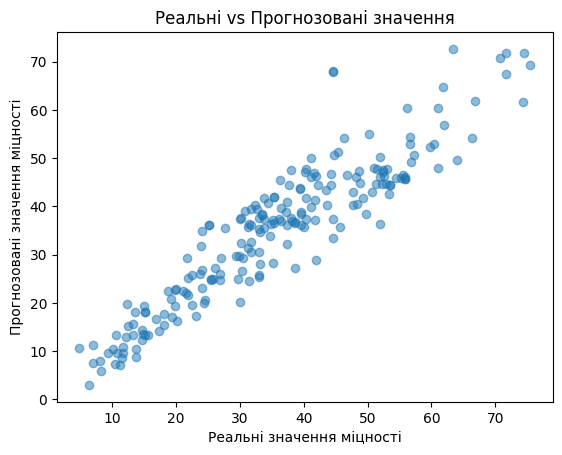

In [15]:

# Прогноз на тестовій вибірці
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()

# Обчислюємо метрики
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')
# %%

# Візуалізація результатів
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Реальні значення міцності')
plt.ylabel('Прогнозовані значення міцності')
plt.title('Реальні vs Прогнозовані значення')
plt.show()

Висновки:
    1. Наша модель нейронної мережі досягла гарних результатів у прогнозуванні міцності бетону:
   - **Середньоквадратична похибка (MSE): 36.87** (хороший результат).
   - **Середня абсолютна похибка (MAE): 4.69** (відмінний результат, оскільки < 5).
   - **Коефіцієнт детермінації (R²): 0.86** (відмінний результат, оскільки > 0.8).

2. Високий R² (0.87) свідчить про те, що модель добре пояснює варіацію в даних і може бути використана для прогнозування.

3. Низькі значення MSE та MAE означають, що середня помилка у прогнозах є невеликою, що робить модель точною.

4. Аналіз факторів показує, що найбільший вплив на міцність бетону мають:
   - Вміст **цементу** (CementComponent) – основний фактор, що підвищує міцність.
   - **Витримка бетону (AgeInDays)** – старіший бетон, як правило, стає міцнішим.
   - **Вміст води (WaterComponent)** – занадто велика кількість води може знизити міцність.

Загалом, модель добре справляється із завданням прогнозування міцності бетону і може бути використана для практичних застосувань у будівництві.